# Week 5 - Logistic Regression and Classification Error Metrics

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

Alternatively the same data set can be found at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/downloads/human-activity-recognition-with-smartphones.zip
The train file can be renamed as Human_Activity_Recognition_Using_Smartphones_Data.csv 

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [1]:
from __future__ import print_function
import os
import warnings
warnings.filterwarnings('ignore') 
#Data Path has to be set as per the file location in your system
data_path = ['..', 'data']
# data_path = ['data']

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [382]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')
data2 = pd.read_csv(filepath, sep=',')
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


The data columns are all floats except for the activity label.

In [3]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [4]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
data.Activity.nunique()

6

Examine the breakdown of activities--they are relatively balanced.

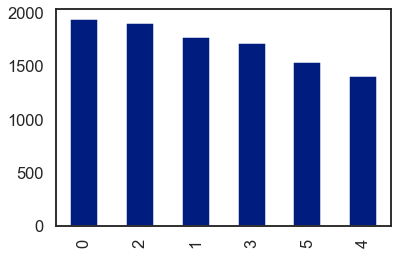

In [52]:
#Plotting value_counts to see distribution of data
data.Activity.value_counts().plot(kind='bar')

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Activity'] = le.fit_transform(data['Activity'])

data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,5
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,5
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,5
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,5


## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [7]:
# Calculate the correlation values
dep_vars = list(data.drop(['Activity'], axis=1).columns)
data2 = data[dep_vars]

# Simplify by emptying all the data below the diagonal
corr = data2.corr(method='pearson')

# Make the unused values NaNs
corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
 
# Stack the data and convert to a data frame
corr = corr.stack().reset_index()

# Get the absolute values for sorting
corr[0] = corr[0].abs()
corr = corr.sort_values(by=[0], ascending=False)
corr

,level_0,level_1,0
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000
96017,tBodyAccMag-arCoeff()3,tGravityAccMag-arCoeff()3,1.000000
94964,tBodyAccMag-entropy(),tGravityAccMag-entropy(),1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000
93546,tBodyAccMag-min(),tGravityAccMag-min(),1.000000
...,...,...,...
89510,"tBodyGyroJerk-arCoeff()-Y,4",fBodyBodyAccJerkMag-min(),0.000012
60200,tBodyGyro-mean()-X,tBodyGyroJerkMag-arCoeff()1,0.000007
95650,tBodyAccMag-arCoeff()1,"angle(tBodyGyroMean,gravityMean)",0.000005
100122,tGravityAccMag-arCoeff()1,"angle(tBodyGyroMean,gravityMean)",0.000005


A histogram of the absolute value correlations.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

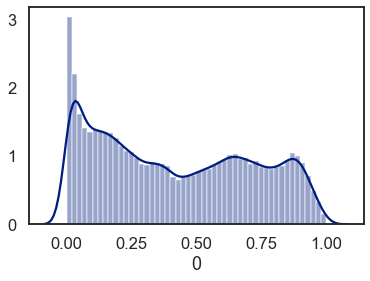

In [26]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

sns.distplot(corr[0])

In [ ]:
# The most highly correlated values
highest_corr = corr.loc[corr[0] >= 0.80].reset_index()


highest_corr


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [344]:
from sklearn.model_selection import StratifiedShuffleSplit

X = data.drop(['Activity'], axis=1)
y = data['Activity']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
# Get the split indexes
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    
X.loc[test_index]

TRAIN: [1575 1707 6425 ... 3037 3002  996] TEST: [7743  969 3175 ... 8914 8756 1470]


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
7743,0.248413,-0.041231,-0.100627,-0.439049,-0.090984,-0.526178,-0.475318,-0.123296,-0.515436,-0.320069,...,0.324086,0.360475,0.161174,0.213114,0.160221,-0.424829,-0.710587,-0.834330,0.155161,-0.086299
969,0.121814,0.012984,-0.054895,0.140315,0.214260,-0.297468,0.071346,0.161296,-0.305484,0.139091,...,0.144791,-0.405843,-0.697331,0.725591,-0.600144,-0.924257,0.283049,-0.687568,0.312766,0.041079
3175,0.233078,-0.013313,-0.072428,-0.385060,-0.383821,-0.106541,-0.376331,-0.434424,-0.116964,-0.374822,...,0.203987,-0.346840,-0.725643,0.514003,-0.765366,-0.375916,0.356251,-0.808517,0.028762,0.138020
8907,0.278403,-0.017006,-0.109171,-0.998783,-0.994460,-0.991908,-0.998932,-0.994084,-0.991750,-0.940334,...,0.128793,-0.262955,-0.634120,-0.198322,-0.187954,0.169692,-0.635389,-0.684020,-0.038944,-0.160458
6368,0.297490,-0.016935,-0.109701,-0.987514,-0.974068,-0.971083,-0.990057,-0.973191,-0.977167,-0.919899,...,-0.225751,-0.368603,-0.770364,-0.037761,-0.196527,0.036951,-0.176941,0.443153,-0.316626,-0.680999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,0.303292,-0.032728,-0.185923,-0.950415,-0.752801,-0.888620,-0.957943,-0.763750,-0.887829,-0.875769,...,-0.476720,-0.223362,-0.600605,0.007799,0.519724,-0.265020,0.478151,-0.789270,0.104695,-0.135242
2327,0.246538,-0.007196,-0.113181,-0.450283,-0.139041,-0.024667,-0.489229,-0.144282,-0.064026,-0.306439,...,0.219221,-0.468519,-0.778995,0.559961,-0.719215,-0.208961,-0.248423,-0.530317,0.269865,0.298691
8914,0.289617,-0.010774,-0.133259,-0.993367,-0.995373,-0.935635,-0.993694,-0.995246,-0.925559,-0.935766,...,0.330558,-0.268589,-0.594786,-0.225719,0.298398,0.502886,-0.451063,-0.838166,0.158459,0.116581
8756,0.309507,-0.087008,-0.122642,-0.967065,-0.781979,-0.850104,-0.972565,-0.762549,-0.843206,-0.884159,...,0.094956,0.033511,-0.250094,-0.092478,-0.124054,0.463858,-0.341227,-0.921871,0.074271,0.071294


In [235]:
# Create the dataframes
X_train = pd.DataFrame(X.loc[train_index], columns=X.columns)
X_test = pd.DataFrame(X.loc[test_index], columns=X.columns)

y_train = pd.DataFrame(y.loc[train_index])
y_test = pd.DataFrame(y.loc[test_index])

In [236]:
#Ratio evenly distributed among classes
print(y_train.Activity.value_counts())
print(y_test.Activity.value_counts())

0    1361
2    1334
1    1244
3    1205
5    1081
4     984
Name: Activity, dtype: int64
0    583
2    572
1    533
3    517
5    463
4    422
Name: Activity, dtype: int64


## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict

# Standard logistic regression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train.values.ravel())

predicted = cross_val_predict(lr, X_test, y_test, cv=5)
print (accuracy_score(y_test, predicted))
print (classification_report(y_test, predicted)) 

0.9770226537216828
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.95      0.94      0.94       533
           2       0.95      0.95      0.95       572
           3       1.00      0.99      0.99       517
           4       0.99      0.99      0.99       422
           5       0.98      0.99      0.99       463

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



In [238]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
C = [10, 1, .1, .001]
lr_l1 = LogisticRegressionCV(Cs=C, cv=5, random_state=42, 
                             penalty='l1', 
                             solver='saga')
lr_l1 = lr_l1.fit(X_train, y_train.values.ravel())

predicted_l1 = cross_val_predict(lr_l1, X_test, y_test, cv=5)
print (accuracy_score(y_test, predicted_l1))
print (classification_report(y_test, predicted_l1)) 

0.976051779935275
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.95      0.93      0.94       533
           2       0.94      0.96      0.95       572
           3       0.99      0.99      0.99       517
           4       0.99      0.99      0.99       422
           5       0.98      0.99      0.98       463

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



In [239]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

#Observations:
#lbfgs: Only for L2 penalty
#sag: Only for L2 penalty
#liblinear: Slow convergence
#newton-cg: Only for L2 penalty

#Actual implementation was taking too long to train and my laptop could not handle it.

In [242]:
from sklearn.linear_model import LogisticRegressionCV

# L2 regularized logistic regression
C = [10, 1, .1, .001]
lr_l2 = LogisticRegressionCV(Cs=C, cv=5, random_state=42, 
                             penalty='l2', 
                             solver='lbfgs',
                             max_iter = 4000)

lr_l2 = lr_l2.fit(X_train, y_train.values.ravel())

predicted_l2 = cross_val_predict(lr_l2, X_test, y_test, cv=5)
print (accuracy_score(y_test, predicted_l2))
print (classification_report(y_test, predicted_l2)) 

0.9763754045307443
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.95      0.94      0.94       533
           2       0.94      0.95      0.95       572
           3       0.99      0.99      0.99       517
           4       0.99      0.99      0.99       422
           5       0.99      0.99      0.99       463

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [401]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for model in coeff_models:
    coefficients.append(model.coef_)
    

lr_coef = abs(lr.coef_)
lr_l1_coef = abs(lr_l1.coef_)
lr_l2_coef = abs(lr_l2.coef_)
lr_coef

activities = data2.Activity.unique()

Prepare six separate plots for each of the multi-class coefficients.

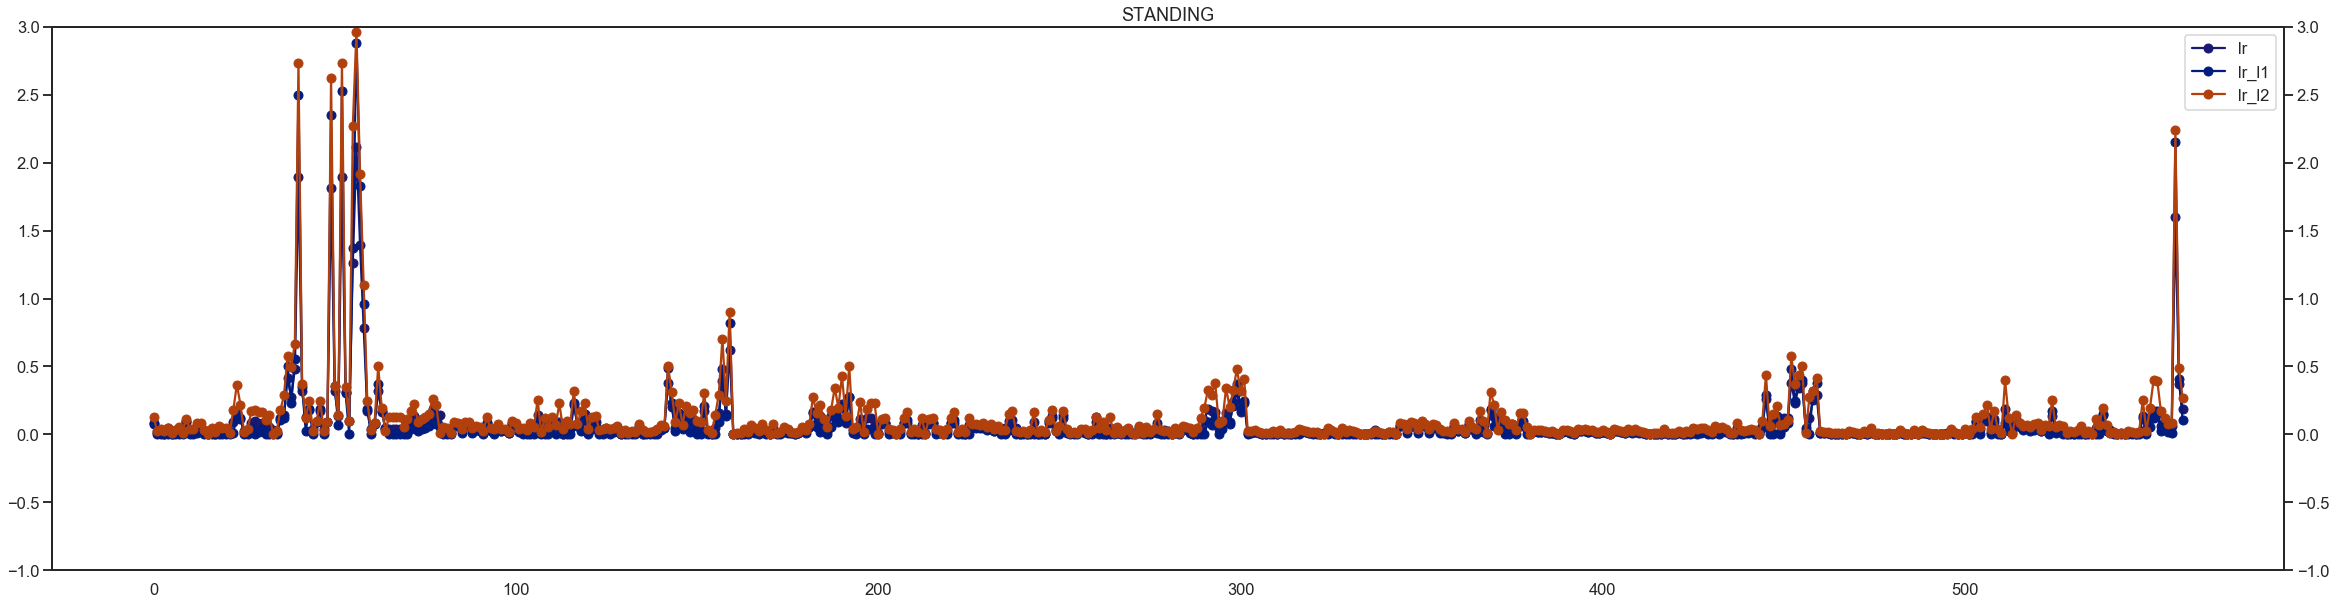

In [404]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr_coef[0], color='midnightblue', marker='o', label='lr');
ax2.plot(lr_l1_coef[0], marker='o', label='lr_l1');
ax2.plot(lr_l2_coef[0], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 3)
ax2.set_ylim(-1, 3)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(40, 10)
plt.title(activities[0]);

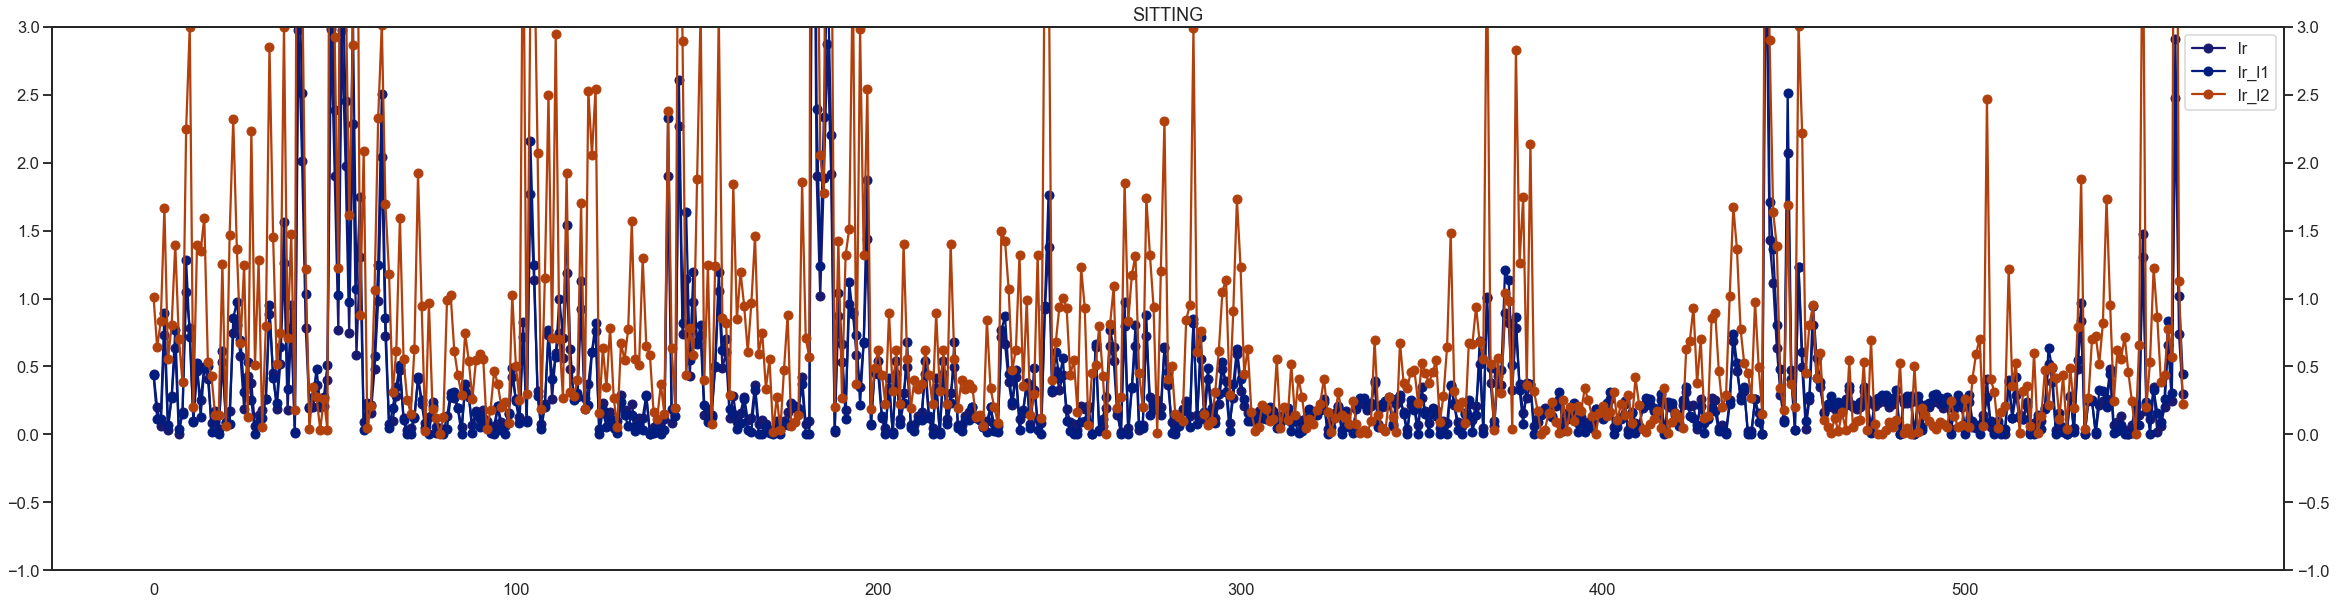

In [405]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr_coef[1], color='midnightblue', marker='o', label='lr');
ax2.plot(lr_l1_coef[1], marker='o', label='lr_l1');
ax2.plot(lr_l2_coef[1], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 3)
ax2.set_ylim(-1, 3)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(40, 10)
plt.title(activities[1]);

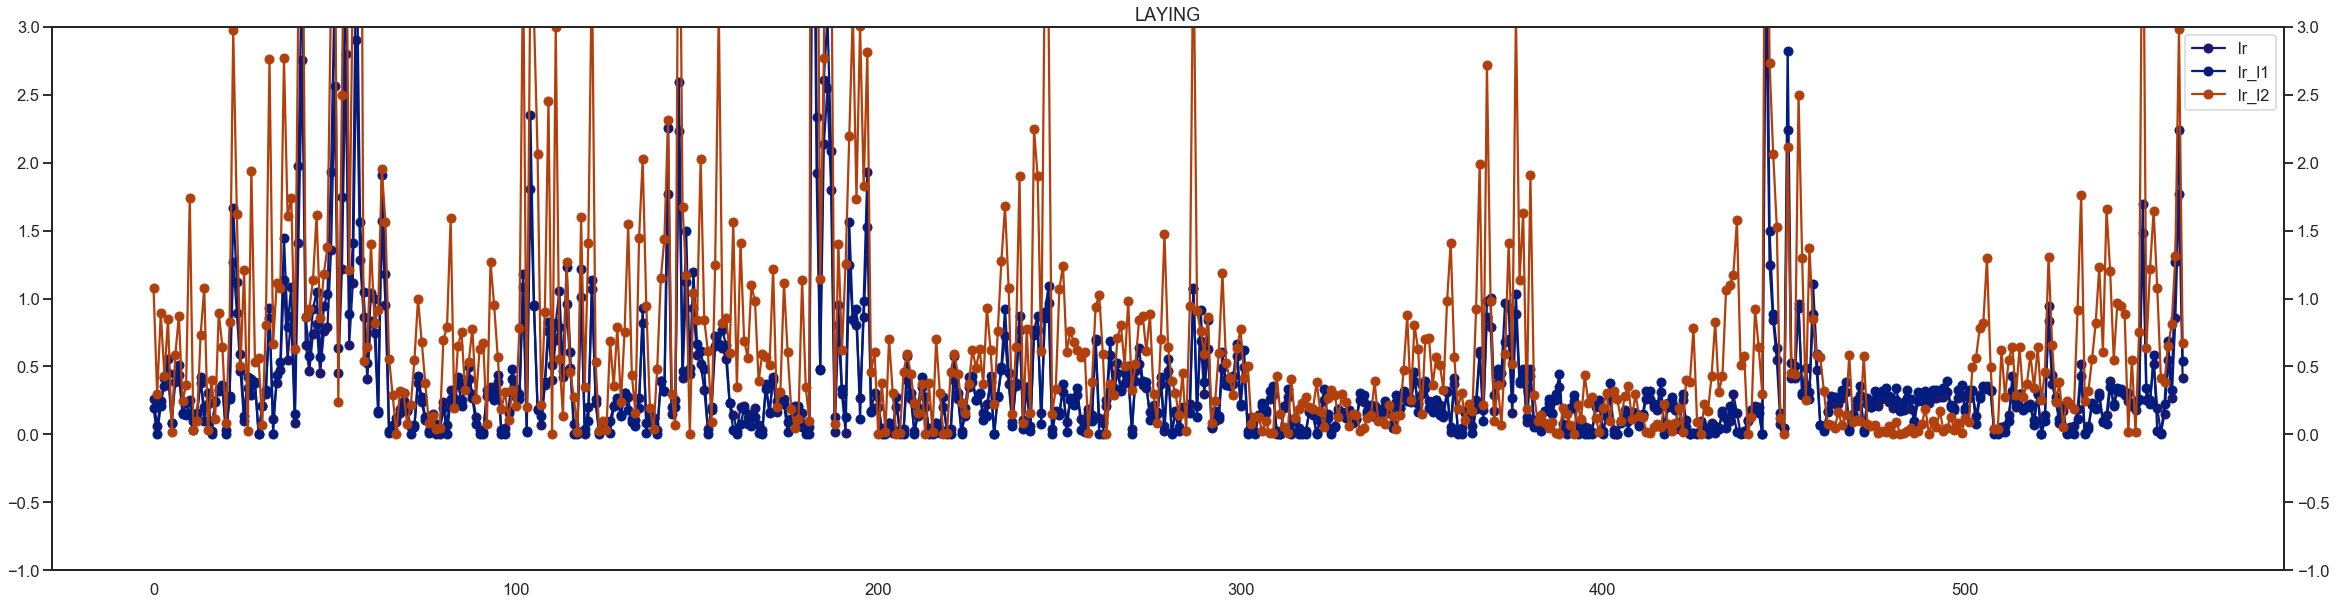

In [406]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr_coef[2], color='midnightblue', marker='o', label='lr');
ax2.plot(lr_l1_coef[2], marker='o', label='lr_l1');
ax2.plot(lr_l2_coef[2], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 3)
ax2.set_ylim(-1, 3)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(40, 10)
plt.title(activities[2]);

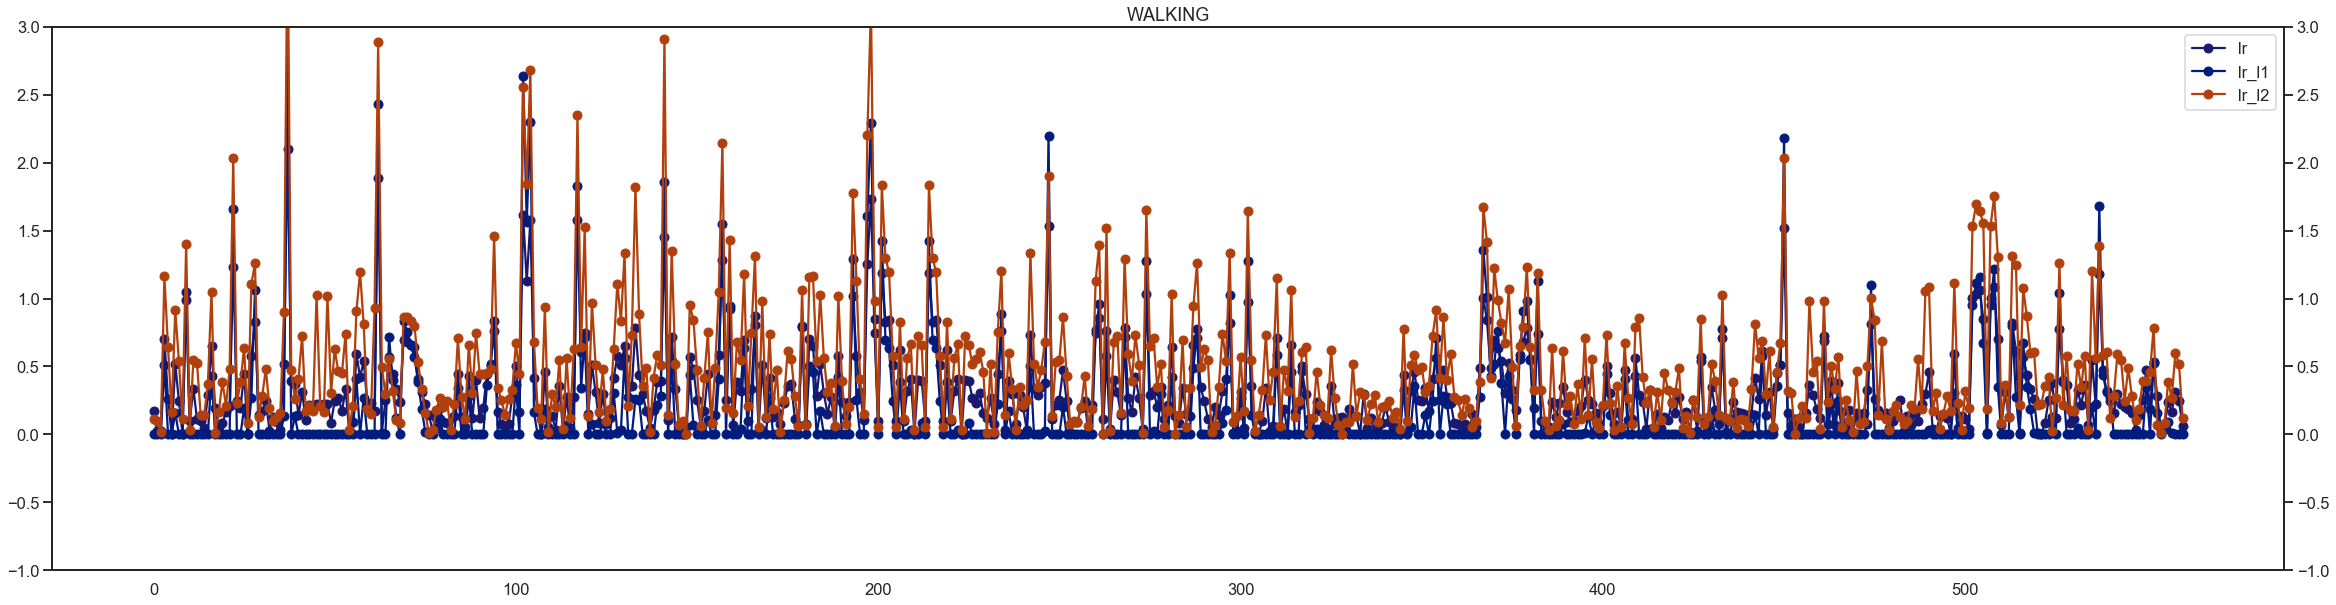

In [407]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr_coef[3], color='midnightblue', marker='o', label='lr');
ax2.plot(lr_l1_coef[3], marker='o', label='lr_l1');
ax2.plot(lr_l2_coef[3], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 3)
ax2.set_ylim(-1, 3)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(40, 10)
plt.title(activities[3]);

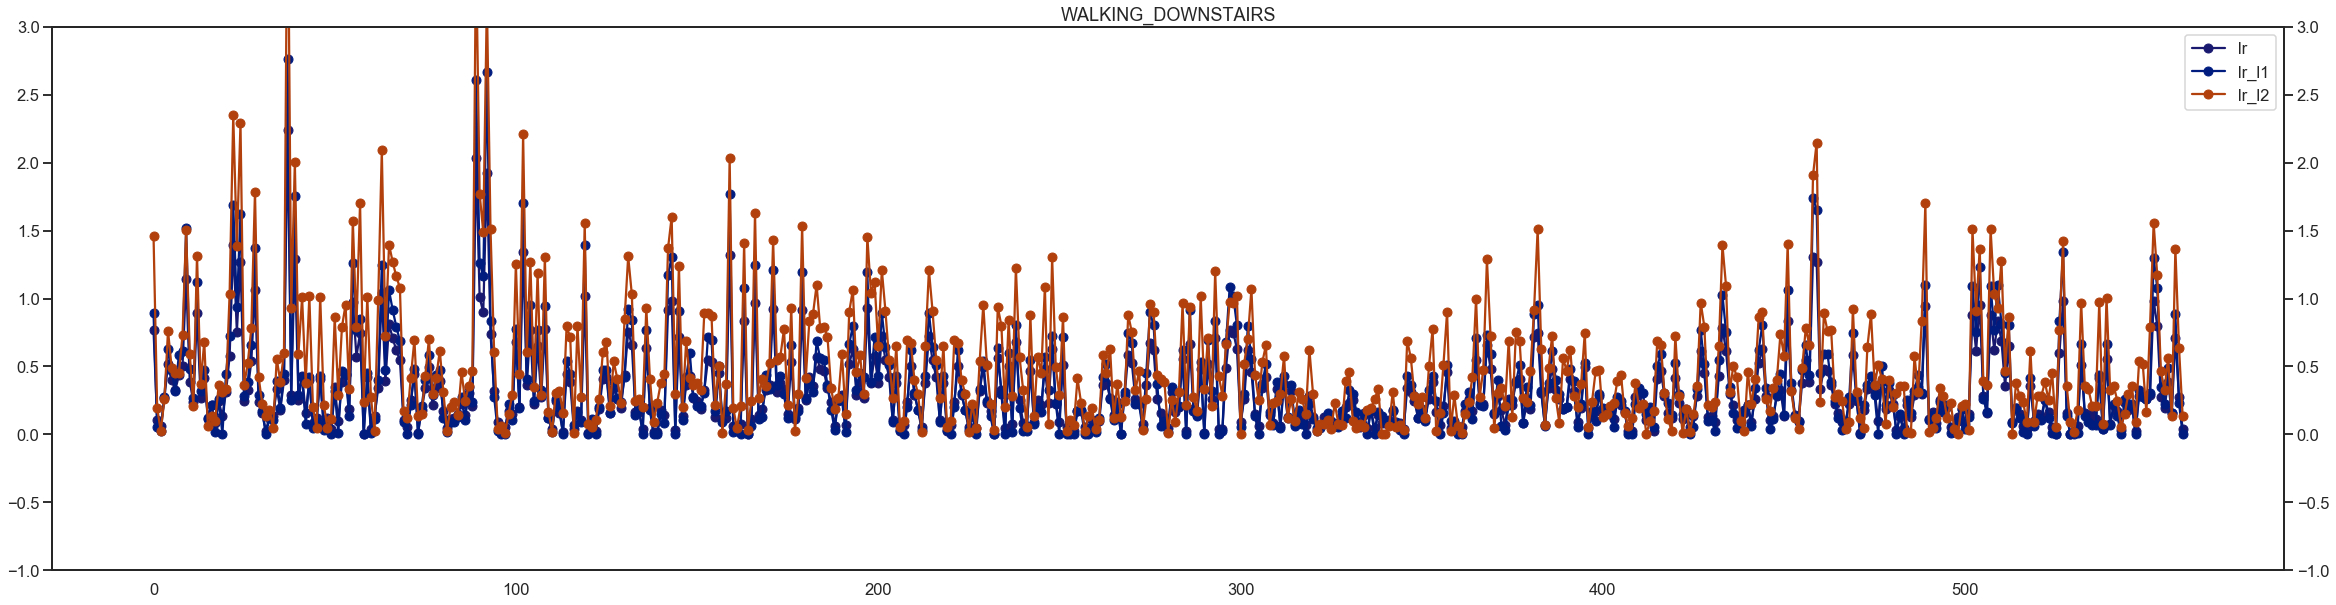

In [408]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr_coef[4], color='midnightblue', marker='o', label='lr');
ax2.plot(lr_l1_coef[4], marker='o', label='lr_l1');
ax2.plot(lr_l2_coef[4], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 3)
ax2.set_ylim(-1, 3)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(40, 10)
plt.title(activities[4]);

## Question 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [245]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

for model in coeff_models:
    y_pred.append(model.predict(X_test))
    y_prob.append(model.predict_proba(X_test))
    
print(y_pred)
print(y_prob)


[array([3, 5, 3, ..., 1, 1, 5]), array([3, 5, 3, ..., 1, 1, 5]), array([3, 5, 3, ..., 1, 1, 5])]
[array([[3.44063398e-05, 1.68346845e-04, 5.67597199e-04, 9.98938794e-01,
        6.32091589e-06, 2.84535055e-04],
       [3.72778427e-05, 3.21173588e-07, 4.23786869e-06, 1.42501685e-04,
        1.16502987e-02, 9.88165363e-01],
       [3.55133019e-05, 4.35279715e-03, 2.96260853e-06, 9.87591660e-01,
        5.01052755e-03, 3.00653951e-03],
       ...,
       [2.38087796e-05, 9.69641876e-01, 3.03281813e-02, 4.11517778e-09,
        4.09015988e-06, 2.03971781e-06],
       [5.51867771e-05, 9.86840263e-01, 1.22429549e-03, 2.68636519e-07,
        2.89313155e-07, 1.18796972e-02],
       [7.06239857e-04, 1.97165456e-06, 2.49758391e-04, 8.28489693e-03,
        9.03578236e-04, 9.89853555e-01]]), array([[2.61430042e-06, 2.67335243e-05, 2.91811645e-04, 9.99634989e-01,
        3.72832047e-07, 4.34787120e-05],
       [4.89519354e-06, 2.41050220e-08, 1.02279207e-06, 5.46883457e-04,
        3.37736825e-03, 9

3090

## Question 7

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [247]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


In [332]:
#Run the metrics
classes = sorted(data.Activity.unique())
y_test_lb = label_binarize(y_test, classes)


for model, prediction in list(zip(coeff_labels, y_pred)):
    print(model)
    precision, recall, fscore, support = score(y_test_lb, label_binarize(prediction, classes))
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"F-Score: {fscore}")
    print(f"Support Score: {support}")
    print(f"Accuracy Score: {accuracy_score(y_test_lb, label_binarize(prediction, classes))}")
    print(f"ROC AUC Score: {roc_auc_score(y_test_lb, label_binarize(prediction, classes))}")
    print(f"Confusion Matrix: {confusion_matrix(y_test, prediction)}")
    print("----------------------------------------------------------------------------")


lr
Precision Score: [1.         0.9588015  0.96322242 0.99613153 0.99526066 0.99568035]
Recall Score: [1.         0.96060038 0.96153846 0.99613153 0.99526066 0.99568035]
F-Score: [1.         0.95970009 0.9623797  0.99613153 0.99526066 0.99568035]
Support Score: [583 533 572 517 422 463]
Accuracy Score: 0.9841423948220065
ROC AUC Score: 0.9908316113572978
Confusion Matrix: [[583   0   0   0   0   0]
 [  0 512  21   0   0   0]
 [  0  22 550   0   0   0]
 [  0   0   0 515   1   1]
 [  0   0   0   1 420   1]
 [  0   0   0   1   1 461]]
----------------------------------------------------------------------------
l1
Precision Score: [1.         0.95708955 0.96485062 0.99230769 0.99763033 0.99782609]
Recall Score: [1.         0.96247655 0.95979021 0.99806576 0.99763033 0.99136069]
F-Score: [1.         0.95977549 0.96231376 0.9951784  0.99763033 0.99458288]
Support Score: [583 533 572 517 422 463]
Accuracy Score: 0.9841423948220065
ROC AUC Score: 0.9908396447013823
Confusion Matrix: [[583   0 

## Question 8

Display or plot the confusion matrix for each model.

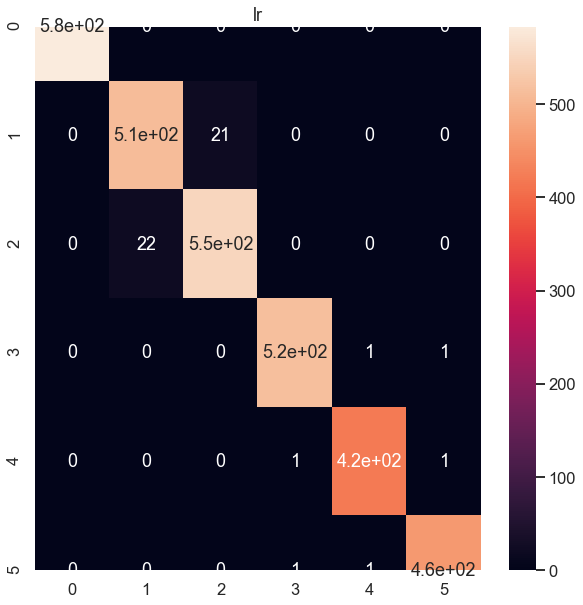

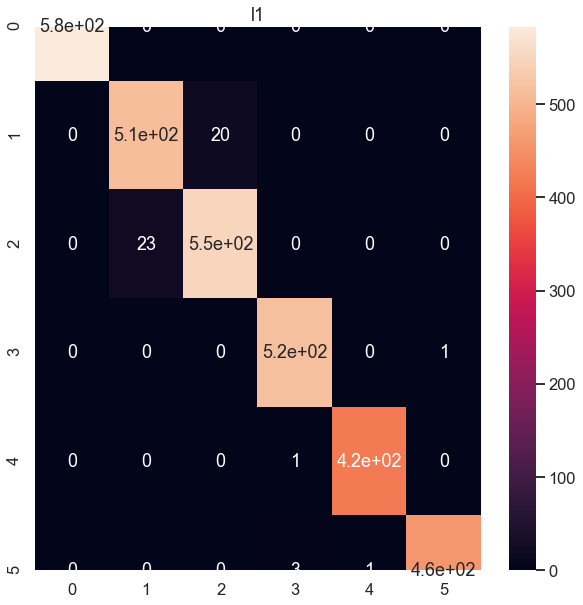

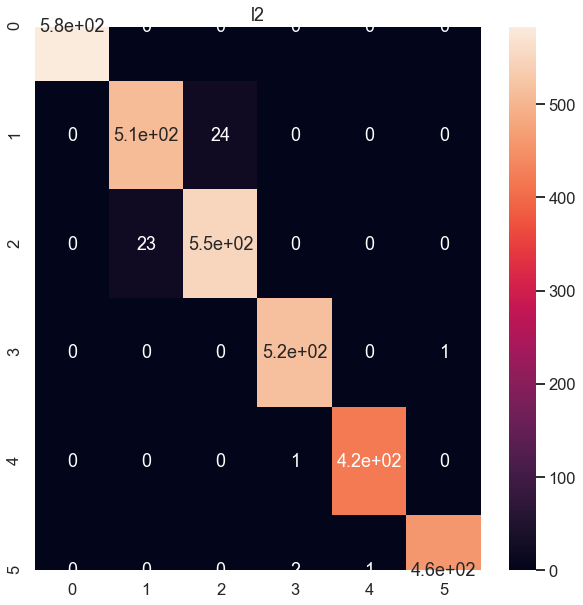

In [329]:
import seaborn as sns

conf_matrix = list()
for prediction in y_pred:
    conf_matrix.append(confusion_matrix(y_test, prediction))
    
# fig, axList = plt.subplots(nrows=2, ncols=2)
# axList = axList.flatten()
# fig.set_size_inches(12, 10)

for ax in range (0,3):
    df_cm = pd.DataFrame(conf_matrix[ax])
    plt.figure(figsize=(10,10))
    sns.heatmap(df_cm, annot=True)
    plt.title(coeff_labels[ax])
    

## Question 9
 Identify highly correlated columns and drop those columns before building models

In [412]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

X = X_train.append(X_test)

#Using SelectKBest
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_sc_train = pd.DataFrame(X_scaled.loc[train_index])
X_sc_test = pd.DataFrame(X_scaled.loc[test_index])

X_selectK = SelectKBest(chi2, k=10).fit_transform(X_sc_train, y_train)


#threshold with .7 (Only left us with 4 columns)
selector = VarianceThreshold(threshold=0.5)
X_select = selector.fit_transform(X)
X_select = pd.DataFrame(X_select, index=X.index)

X_s_train = pd.DataFrame(X_select.loc[train_index])
X_s_test = pd.DataFrame(X_select.loc[test_index])

X_selectK.shape

#Using filtering(Yielded the highest accuracy but not more than regular)
h_corr = data2.corr(method='pearson').abs()
upper = h_corr.where(np.triu(np.ones(h_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
X_corr_train = X_train.drop(X_train[to_drop], axis=1)
X_corr_test = X_test.drop(X_test[to_drop], axis=1)


 Repeat Model building with new training data after removing higly correlated columns

In [316]:
# Try standard, L1 and L2 Logistic regression

# Standard logistic regression
lr2 = LogisticRegression()
lr2 = lr2.fit(X_corr_train, y_train.values.ravel())

predicted = cross_val_predict(lr2, X_corr_test, y_test, cv=5)
print (accuracy_score(y_test, predicted))
print (classification_report(y_test, predicted)) 

0.9459546925566343
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.91      0.87      0.89       533
           2       0.89      0.91      0.90       572
           3       0.97      0.98      0.97       517
           4       0.96      0.96      0.96       422
           5       0.95      0.96      0.96       463

    accuracy                           0.95      3090
   macro avg       0.95      0.95      0.95      3090
weighted avg       0.95      0.95      0.95      3090



In [317]:
# L1 regularized logistic regression
C = [10, 1, .1, .001]
lr2_l1 = LogisticRegressionCV(Cs=C, cv=5, random_state=42, 
                             penalty='l1', 
                             solver='saga')
lr2_l1 = lr2_l1.fit(X_corr_train, y_train.values.ravel())

predicted_l1 = cross_val_predict(lr2_l1, X_corr_test, y_test, cv=5)
print (accuracy_score(y_test, predicted_l1))
print (classification_report(y_test, predicted_l1))

0.9446601941747573
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.90      0.86      0.88       533
           2       0.88      0.90      0.89       572
           3       0.97      0.97      0.97       517
           4       0.96      0.98      0.97       422
           5       0.96      0.96      0.96       463

    accuracy                           0.94      3090
   macro avg       0.95      0.95      0.95      3090
weighted avg       0.94      0.94      0.94      3090



In [318]:
# L2 regularized logistic regression
C = [10, 1, .1, .001]
lr2_l2 = LogisticRegressionCV(Cs=C, cv=5, random_state=42, 
                             penalty='l2', 
                             solver='lbfgs',
                             max_iter = 4000)

lr2_l2 = lr2_l2.fit(X_corr_train, y_train.values.ravel())

predicted_l2 = cross_val_predict(lr2_l2, X_corr_test, y_test, cv=5)
print (accuracy_score(y_test, predicted_l2))
print (classification_report(y_test, predicted_l2)) 

0.945631067961165
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.91      0.86      0.88       533
           2       0.88      0.91      0.90       572
           3       0.97      0.98      0.98       517
           4       0.96      0.97      0.97       422
           5       0.95      0.96      0.95       463

    accuracy                           0.95      3090
   macro avg       0.95      0.95      0.95      3090
weighted avg       0.95      0.95      0.95      3090



In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations
#My laptop was close to overheating when running 

## Question 10

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

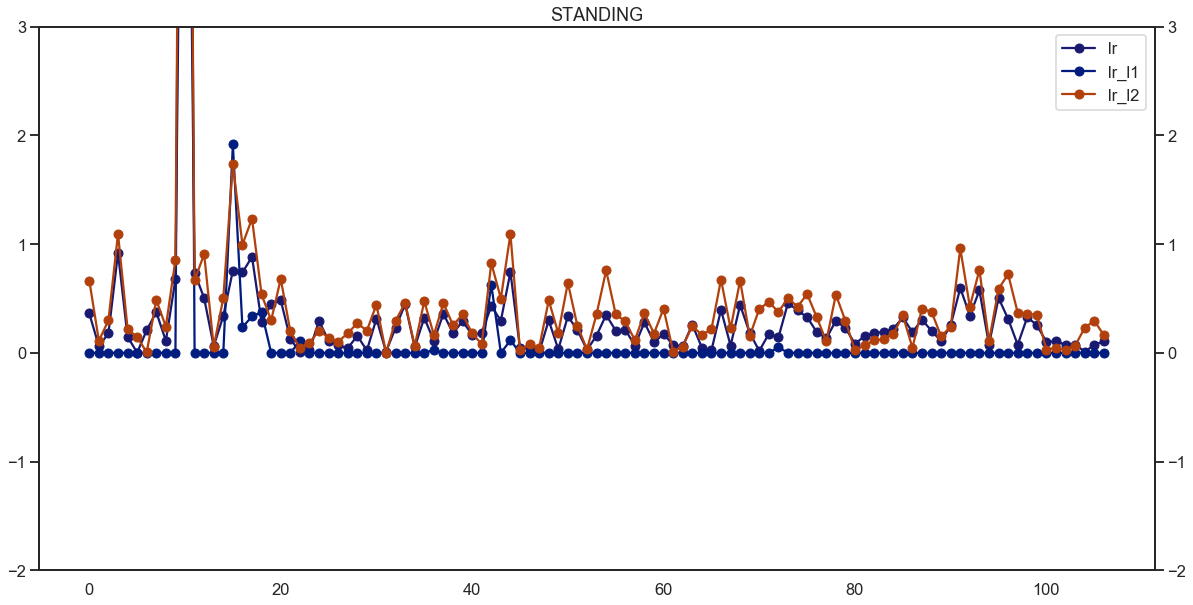

In [388]:
# Combine all the coefficients into a dataframe for comparison

models = [lr2, lr2_l1, lr2_l2]
coefficients2 = list()

for model in models:
    coefficients2.append(model.coef_)
    

lr2_coef =abs(lr2.coef_)
lr2_l1_coef = abs(lr2_l1.coef_)
lr2_l2_coef = abs(lr2_l2.coef_)

activities = data2.Activity.unique()

     
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr2_coef[0], color='midnightblue', marker='o', label='lr');
ax2.plot(lr2_l1_coef[0], marker='o', label='lr_l1');
ax2.plot(lr2_l2_coef[0], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-2, 3)
ax2.set_ylim(-2, 3)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title(activities[0]);




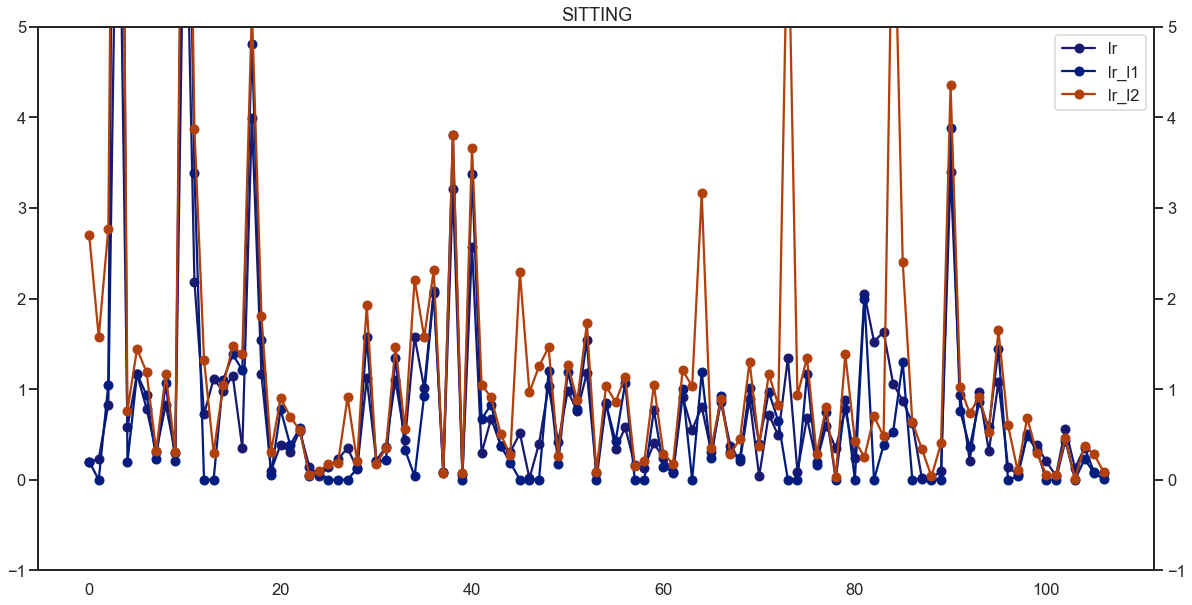

In [395]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr2_coef[1], color='midnightblue', marker='o', label='lr');
ax2.plot(lr2_l1_coef[1], marker='o', label='lr_l1');
ax2.plot(lr2_l2_coef[1], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 5)
ax2.set_ylim(-1, 5)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title(activities[1]);

Prepare six separate plots for each of the multi-class coefficients.

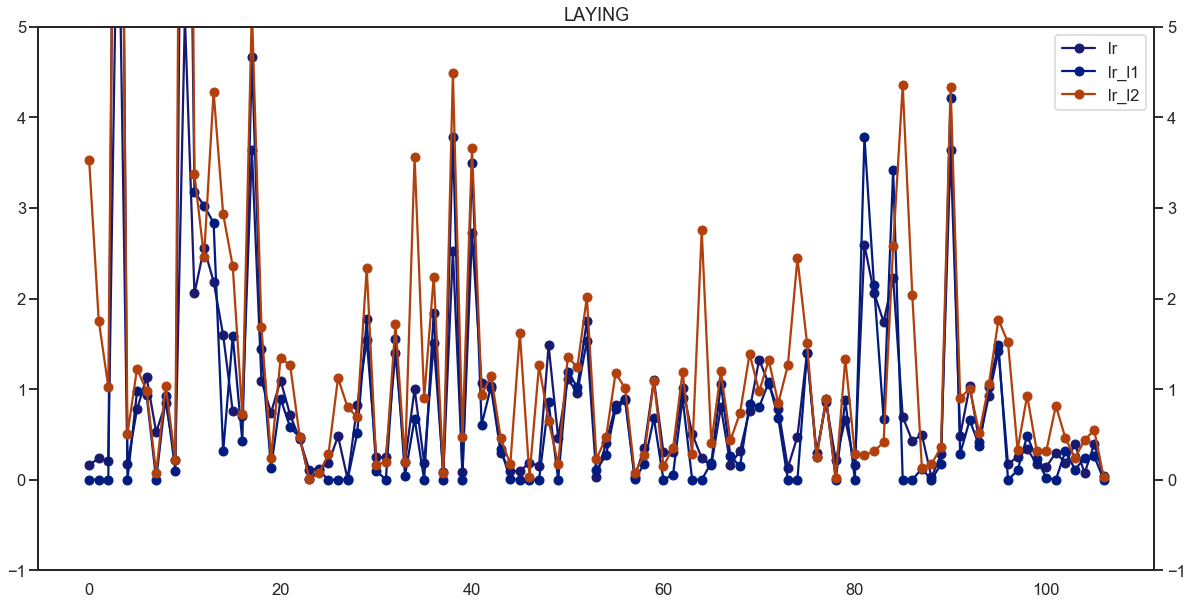

In [394]:
# try the plots
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr2_coef[2], color='midnightblue', marker='o', label='lr');
ax2.plot(lr2_l1_coef[2], marker='o', label='lr_l1');
ax2.plot(lr2_l2_coef[2], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 5)
ax2.set_ylim(-1, 5)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title(activities[2]);

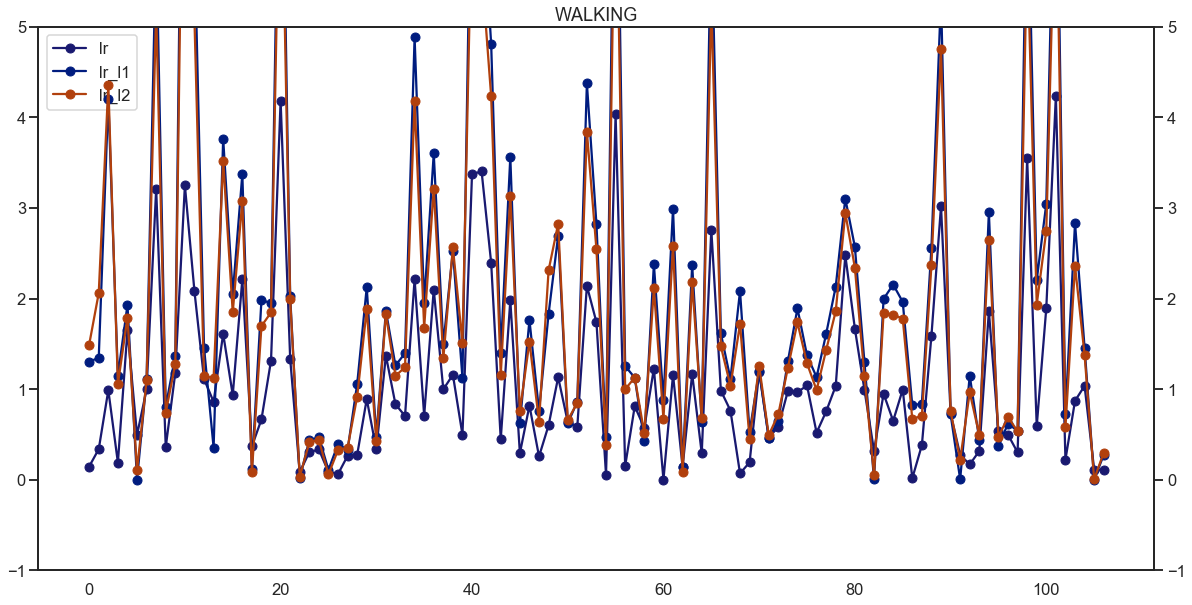

In [393]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr2_coef[3], color='midnightblue', marker='o', label='lr');
ax2.plot(lr2_l1_coef[3], marker='o', label='lr_l1');
ax2.plot(lr2_l2_coef[3], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 5)
ax2.set_ylim(-1, 5)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title(activities[3]);

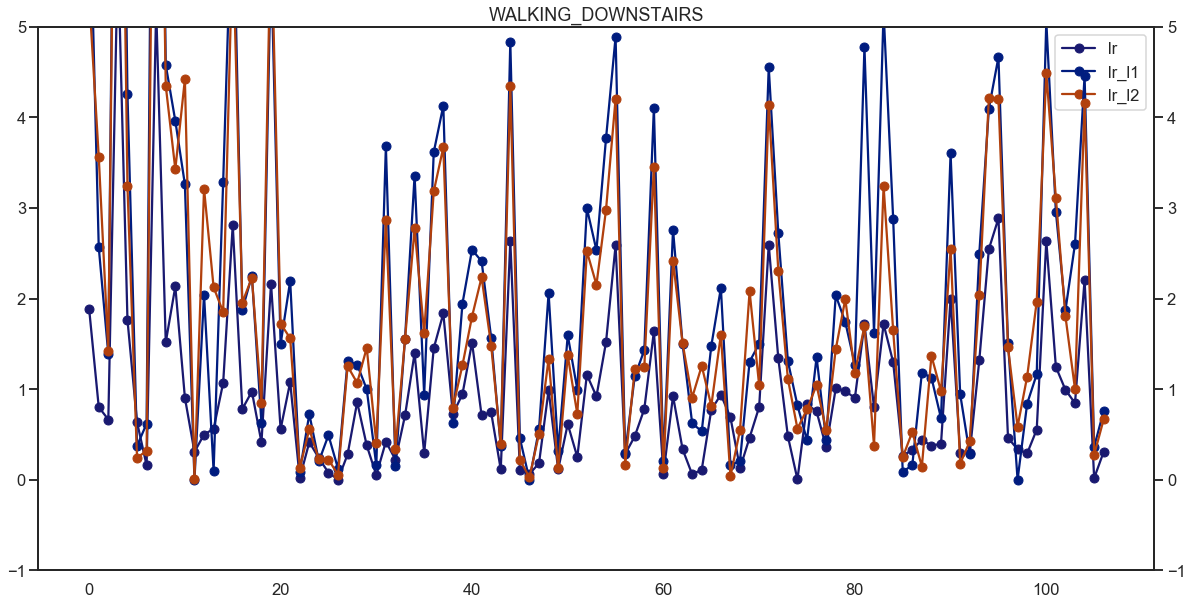

In [396]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr2_coef[4], color='midnightblue', marker='o', label='lr');
ax2.plot(lr2_l1_coef[4], marker='o', label='lr_l1');
ax2.plot(lr2_l2_coef[4], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 5)
ax2.set_ylim(-1, 5)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title(activities[4]);

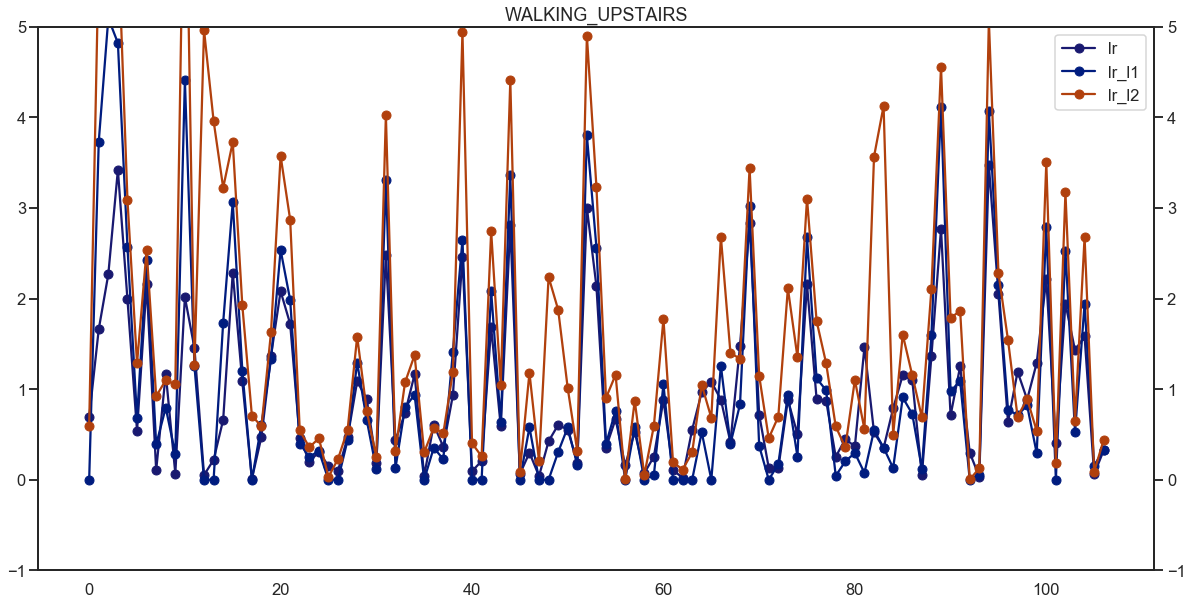

In [397]:
ax1 = plt.axes()
ax2 = ax1.twinx()

#Plotting the regression 
ax1.plot(lr2_coef[5], color='midnightblue', marker='o', label='lr');
ax2.plot(lr2_l1_coef[5], marker='o', label='lr_l1');
ax2.plot(lr2_l2_coef[5], marker='o', label='lr_l2');

#Change axis scales
ax1.set_ylim(-1, 5)
ax2.set_ylim(-1, 5)

#Putting the legend together
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title(activities[5]);

## Question 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [323]:
# Predict the class and the probability for each
y_pred_2 = list()
y_prob_2 = list()

for model in models:
    y_pred_2.append(model.predict(X_corr_test))
    y_prob_2.append(model.predict_proba(X_corr_test))
    
print(y_pred_2)
print(y_prob_2)

[array([3, 5, 3, ..., 1, 1, 5]), array([3, 5, 3, ..., 1, 1, 5]), array([3, 5, 3, ..., 1, 1, 5])]
[array([[2.68246989e-04, 3.12606329e-03, 3.30895240e-03, 9.91943407e-01,
        7.46354767e-06, 1.34586708e-03],
       [3.40583026e-04, 1.59102157e-05, 4.70128822e-05, 4.16990736e-03,
        7.39801963e-02, 9.21446390e-01],
       [7.14693792e-04, 2.44203139e-02, 8.44220332e-04, 9.00485693e-01,
        7.17486819e-02, 1.78639685e-03],
       ...,
       [5.95253295e-04, 9.84394927e-01, 1.48944908e-02, 1.07341386e-05,
        5.95216691e-07, 1.03999426e-04],
       [7.26052793e-04, 8.75304050e-01, 2.48664278e-03, 9.52848086e-09,
        1.53326666e-07, 1.21483091e-01],
       [3.00503054e-03, 3.85038121e-05, 6.02934703e-02, 2.09258386e-02,
        5.31520949e-03, 9.10421947e-01]]), array([[4.79273181e-05, 7.12727842e-04, 9.51757972e-04, 9.97863145e-01,
        1.64763037e-10, 4.24441887e-04],
       [3.74968172e-05, 2.16232773e-08, 2.66459768e-07, 4.61380834e-05,
        1.57742618e-02, 9

## Question 12

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [324]:
# Calculate the error metrics as listed above
classes = sorted(data.Activity.unique())
y_test_lb = label_binarize(y_test, classes)


for model, prediction in list(zip(coeff_labels, y_pred_2)):
    print(model)
    precision2, recall2, fscore2, support2 = score(y_test_lb, label_binarize(prediction, classes))
    print(f"Precision Score: {precision2}")
    print(f"Recall Score: {recall2}")
    print(f"F-Score: {fscore2}")
    print(f"Support Score: {support2}")
    print(f"Accuracy Score: {accuracy_score(y_test_lb, label_binarize(prediction, classes))}")
    print(f"ROC AUC Score: {roc_auc_score(y_test_lb, label_binarize(prediction, classes))}")
    print(f"Confusion Matrix: {confusion_matrix(y_test, prediction)}")
    print("----------------------------------------------------------------------------")

lr
Precision Score: [1.         0.88439306 0.87993139 0.97687861 0.96941176 0.96753247]
Recall Score: [0.99828473 0.86116323 0.89685315 0.98065764 0.97630332 0.96544276]
F-Score: [0.99914163 0.87262357 0.88831169 0.97876448 0.97284534 0.96648649]
Support Score: [583 533 572 517 422 463]
Accuracy Score: 0.9449838187702265
ROC AUC Score: 0.9676828062999894
Confusion Matrix: [[582   1   0   0   0   0]
 [  0 459  69   3   0   2]
 [  0  59 513   0   0   0]
 [  0   0   0 507   4   6]
 [  0   0   0   3 412   7]
 [  0   0   1   6   9 447]]
----------------------------------------------------------------------------
l1
Precision Score: [0.99828767 0.89648438 0.88356164 0.97120921 0.97635934 0.96995708]
Recall Score: [1.         0.86116323 0.9020979  0.9787234  0.97867299 0.9762419 ]
F-Score: [0.9991431  0.8784689  0.89273356 0.97495183 0.97751479 0.97308934]
Support Score: [583 533 572 517 422 463]
Accuracy Score: 0.9478964401294498
ROC AUC Score: 0.9694883660164638
Confusion Matrix: [[583   0 

## Question 13

Display or plot the confusion matrix for each model.

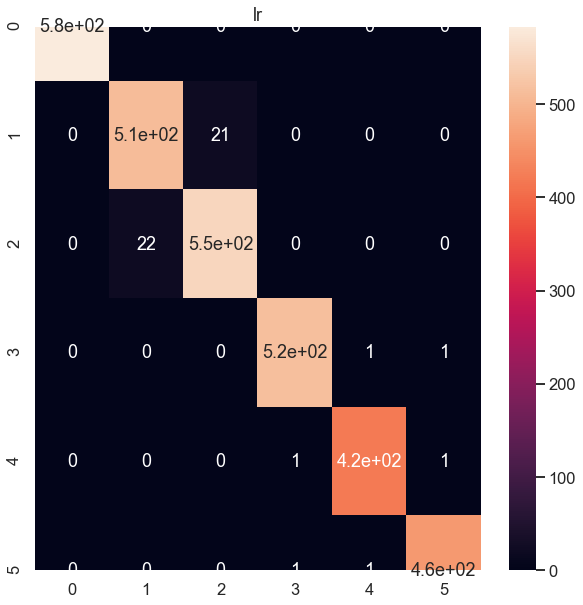

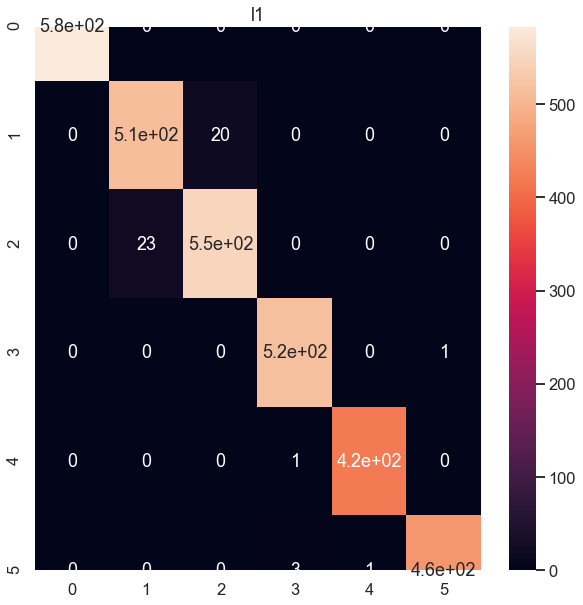

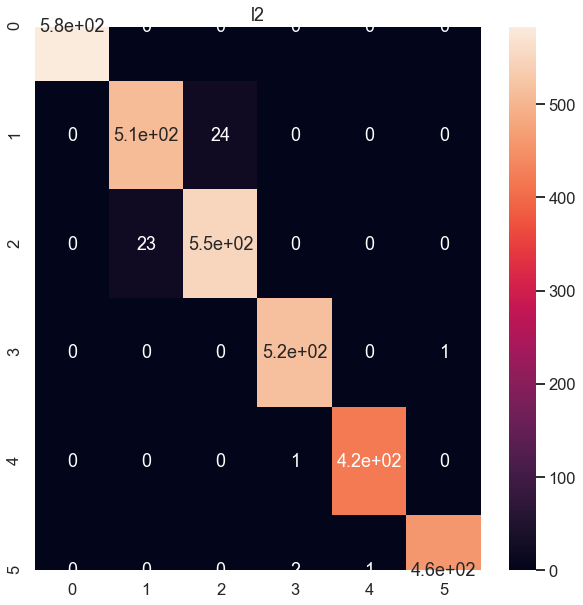

In [330]:
#Plot the confusion matrix

conf_matrix_2 = list()
for prediction in y_pred_2:
    conf_matrix_2.append(confusion_matrix(y_test, prediction))
    
for ax in range (0,3):
    df_cm = pd.DataFrame(conf_matrix[ax])
    plt.figure(figsize=(10,10))
    sns.heatmap(df_cm, annot=True)
    plt.title(coeff_labels[ax])

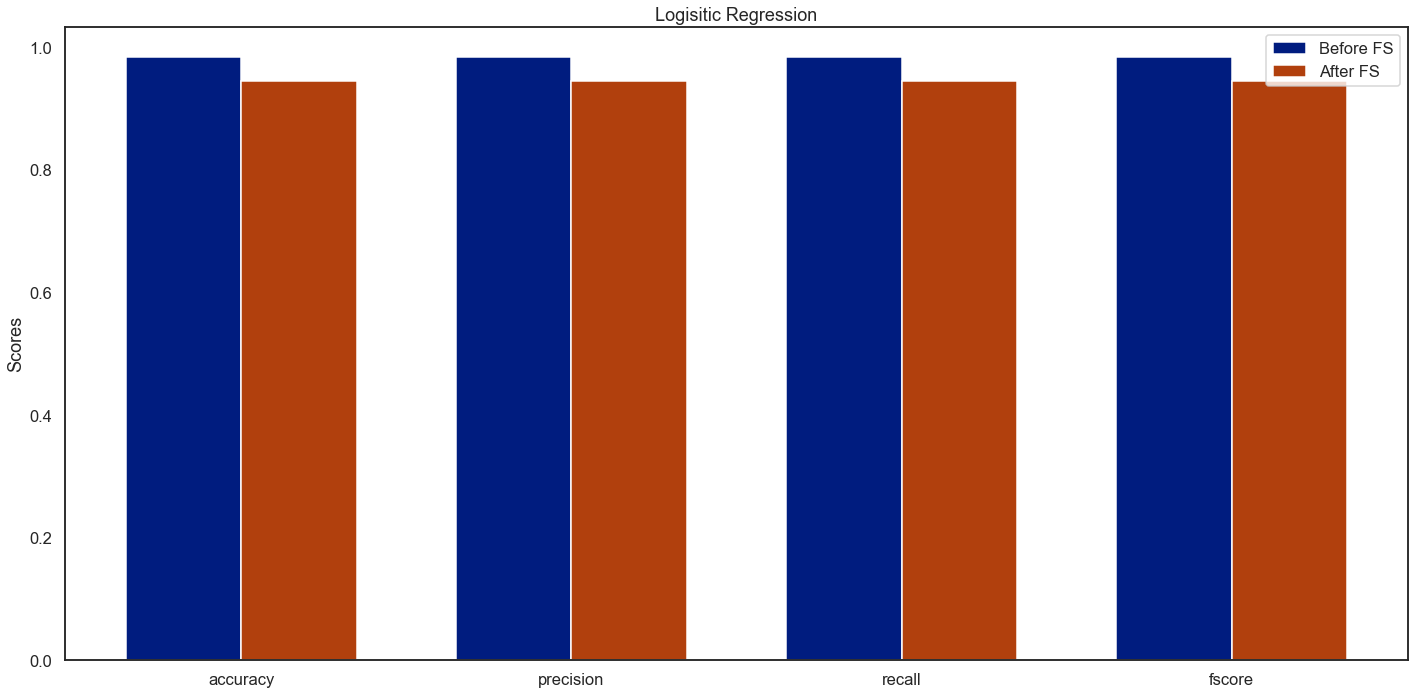

In [457]:
# Perform a comparison of the outputs between Question 7 and 12 and give your observation
labels = ['accuracy', 'precision', 'recall', 'fscore']

#Score before (lr)
accuracy_bf = accuracy_score(y_test_lb, label_binarize(lr.predict(X_test), classes))
precision_bf, recall_bf, fscore_bf, _ = score(y_test_lb, label_binarize(lr.predict(X_test), classes), average='weighted')
#Score after (lr)
accuracy_af = accuracy_score(y_test_lb, label_binarize(lr2.predict(X_corr_test), classes))
precision_af, recall_af, fscore_af, _ = score(y_test_lb, label_binarize(lr2.predict(X_corr_test), classes), average='weighted')

before_fs = [accuracy_bf, precision_bf, recall_bf, fscore_bf]
after_fs = [accuracy_af, precision_af, recall_af, fscore_af]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_fs, width, label='Before FS')
rects2 = ax.bar(x + width/2, after_fs, width, label='After FS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Logisitic Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_size_inches(20, 10)
fig.tight_layout()


plt.show()

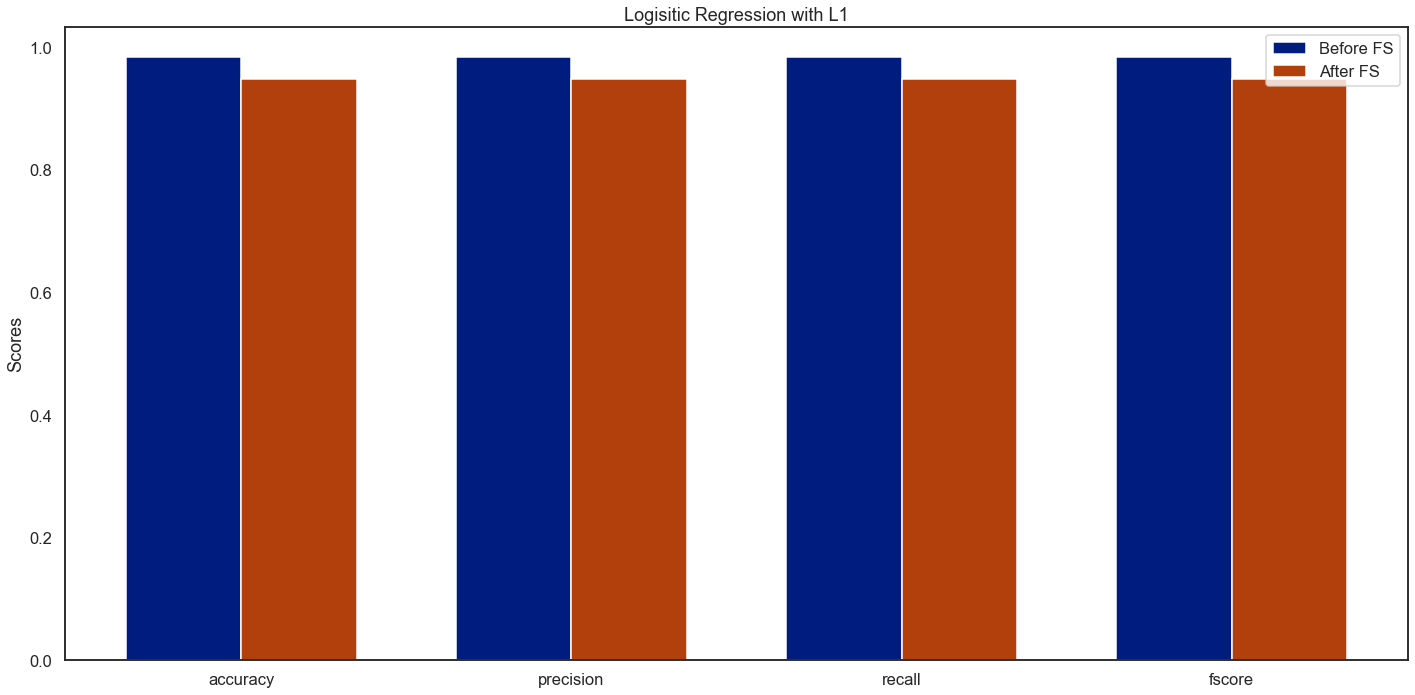

In [459]:
# Perform a comparison of the outputs between Question 7 and 12 and give your observation
labels = ['accuracy', 'precision', 'recall', 'fscore']

#Score before (lr_l1)
accuracy_bf = accuracy_score(y_test_lb, label_binarize(lr_l1.predict(X_test), classes))
precision_bf, recall_bf, fscore_bf, _ = score(y_test_lb, label_binarize(lr_l1.predict(X_test), classes), average='weighted')
#Score after (lr_l1)
accuracy_af = accuracy_score(y_test_lb, label_binarize(lr2_l1.predict(X_corr_test), classes))
precision_af, recall_af, fscore_af, _ = score(y_test_lb, label_binarize(lr2_l1.predict(X_corr_test), classes), average='weighted')

before_fs = [accuracy_bf, precision_bf, recall_bf, fscore_bf]
after_fs = [accuracy_af, precision_af, recall_af, fscore_af]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_fs, width, label='Before FS')
rects2 = ax.bar(x + width/2, after_fs, width, label='After FS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Logisitic Regression with L1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_size_inches(20, 10)
fig.tight_layout()


plt.show()

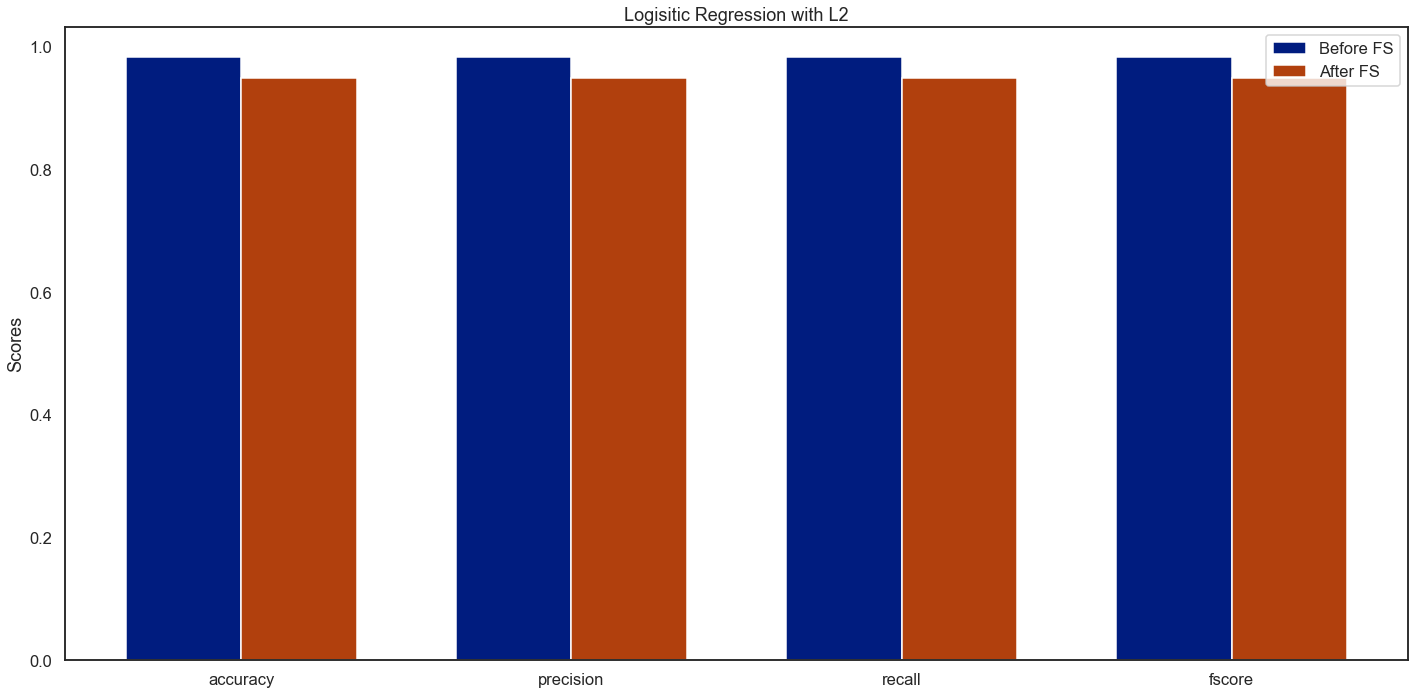

In [460]:
# Perform a comparison of the outputs between Question 7 and 12 and give your observation
labels = ['accuracy', 'precision', 'recall', 'fscore']

#Score before (lr)
accuracy_bf = accuracy_score(y_test_lb, label_binarize(lr_l2.predict(X_test), classes))
precision_bf, recall_bf, fscore_bf, _ = score(y_test_lb, label_binarize(lr_l2.predict(X_test), classes), average='weighted')
#Score after (lr)
accuracy_af = accuracy_score(y_test_lb, label_binarize(lr2_l2.predict(X_corr_test), classes))
precision_af, recall_af, fscore_af, _ = score(y_test_lb, label_binarize(lr2_l2.predict(X_corr_test), classes), average='weighted')

before_fs = [accuracy_bf, precision_bf, recall_bf, fscore_bf]
after_fs = [accuracy_af, precision_af, recall_af, fscore_af]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_fs, width, label='Before FS')
rects2 = ax.bar(x + width/2, after_fs, width, label='After FS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Logisitic Regression with L2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_size_inches(20, 10)
fig.tight_layout()


plt.show()

In [ ]:
# Perform a comparison of the outputs between Question 8 and 13 and give your observation